In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 시험성적 데이터

In [3]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   columns=['시간','점수'])
data

,시간,점수
0,2,20
1,4,40
2,8,80
3,9,90


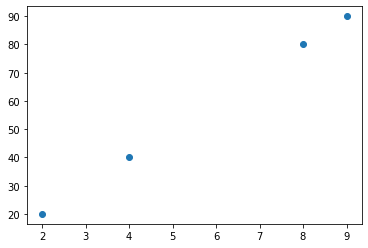

In [4]:
plt.scatter(data['시간'],data['점수'])

## 경사하강법
- 가중치(w)변화에 따른 비용함수(cost)값의 변화

### cost function

In [5]:
#x, y, w
def cost(data, target, weight):
    hx = weight*data
    return ((hx-target)**2).mean()

In [6]:
cost(data['시간'], data['점수'], 10)

0.0

In [7]:
cost(data['시간'], data['점수'], 15)

1031.25

In [8]:
cost(data['시간'], data['점수'], 5)

1031.25

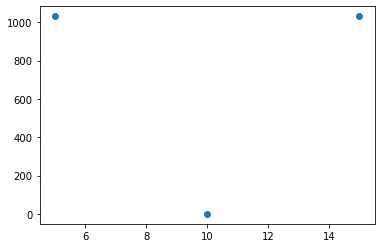

In [9]:
cost10 = cost(data['시간'], data['점수'], 10)
cost5 = cost(data['시간'], data['점수'], 5)
cost15 = cost(data['시간'], data['점수'], 15)
plt.scatter([10,5,15],[cost10, cost5, cost15]) 

In [10]:
weight_arr = range(-10,31)
cost_arr = []
for w in weight_arr:
    c = cost(data['시간'], data['점수'],w)
    cost_arr.append(c)

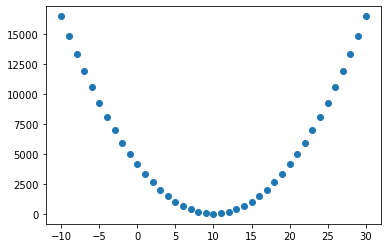

In [11]:
plt.scatter(weight_arr, cost_arr)

## SGDRegressor

In [12]:
from sklearn.linear_model import SGDRegressor

In [14]:
model = SGDRegressor(max_iter=1000, #가중치 업데이트 반복 횟수(epoch)
                    eta0=0.05, #학습률(Learning rate, 0~1)
                    verbose=1,#학습과정 확인 할 수 있다
                    random_state=0 )

In [15]:
model.fit(data[['시간']], data['점수'])

-- Epoch 1
Norm: 5.36, NNZs: 1, Bias: 1.535279, T: 4, Avg. loss: 288.637856
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.01, NNZs: 1, Bias: 1.222401, T: 8, Avg. loss: 261.270852
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8.48, NNZs: 1, Bias: 1.676305, T: 12, Avg. loss: 43.091681
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.38, NNZs: 1, Bias: 1.807779, T: 16, Avg. loss: 10.348361
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.83, NNZs: 1, Bias: 1.810884, T: 20, Avg. loss: 1.955355
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.78, NNZs: 1, Bias: 1.770729, T: 24, Avg. loss: 0.431061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.85, NNZs: 1, Bias: 1.744352, T: 28, Avg. loss: 0.424363
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.92, NNZs: 1, Bias: 1.724007, T: 32, Avg. loss: 0.498933
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.675835, T: 36, Avg. loss: 0.466372
Total training time: 0.00 seconds.
-- Epo

SGDRegressor(eta0=0.05, random_state=0, verbose=1)

In [16]:
model.predict(data[['시간']])

array([20.30076371, 40.20719643, 80.02006187, 89.97327823])

In [17]:
model.coef_

array([9.95321636])

In [18]:
model.intercept_

array([0.39433099])

In [19]:
model.score(data[['시간']], data['점수'])

0.9999589295568384